<bound method NDFrame.head of      Sample ID  INROW  ROWNO  REP  Date (wat)     N     P     K     S     CA  \
0          1.0    2.0    1.0    A         4.0  4.79  0.53  5.70  0.36  2.605   
1          2.0    1.5    1.0    A         4.0  4.21  0.36  5.72  0.25  2.792   
2          3.0    2.0    2.0    A         4.0  4.25  0.44  4.21  0.41  4.535   
3          4.0    1.5    2.0    A         4.0  4.91  0.39  5.42  0.28  2.720   
4          5.0    2.0    1.0    B         4.0  4.65  0.38  5.29  0.24  3.693   
..         ...    ...    ...  ...         ...   ...   ...   ...   ...    ...   
195        NaN    NaN    NaN  NaN         NaN   NaN   NaN   NaN   NaN    NaN   
196        NaN    NaN    NaN  NaN         NaN   NaN   NaN   NaN   NaN    NaN   
197        NaN    NaN    NaN  NaN         NaN   NaN   NaN   NaN   NaN    NaN   
198        NaN    NaN    NaN  NaN         NaN   NaN   NaN   NaN   NaN    NaN   
199        NaN    NaN    NaN  NaN         NaN   NaN   NaN   NaN   NaN    NaN   

     ... 

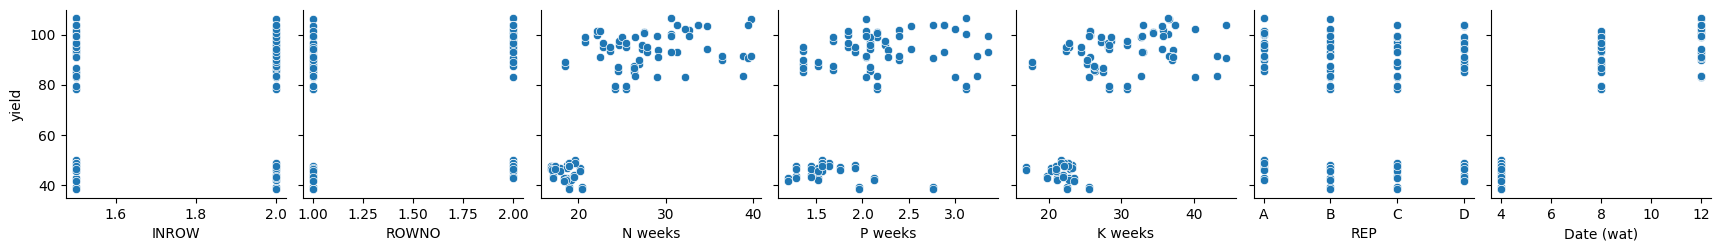

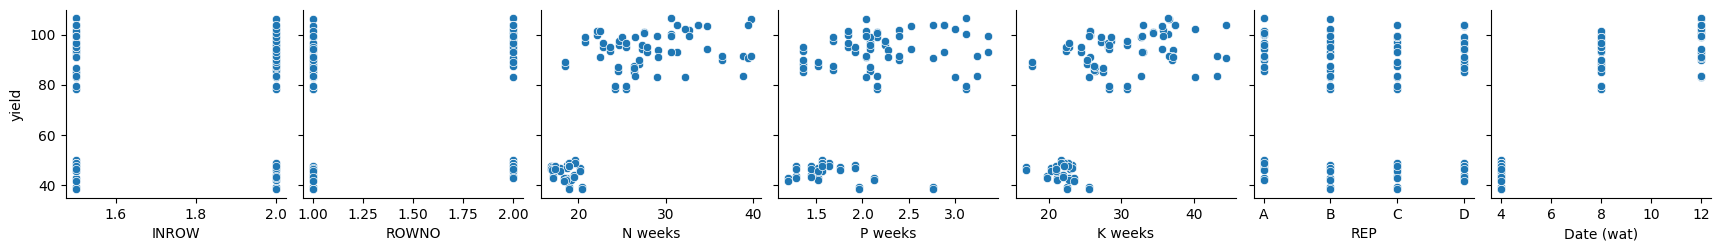

NameError: name 'y' is not defined

In [6]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/foliar.csv')

print(df.head)

print(df.describe())


import seaborn as sns
import matplotlib.pyplot as plt
df['N weeks']=df['N']*df['Date (wat)']
df['P weeks']=df['P']*df['Date (wat)']
df['K weeks']=df['K']*df['Date (wat)']

sns.pairplot(df, x_vars=['INROW', 'ROWNO',  'N weeks','P weeks','K weeks','REP' ,'Date (wat)'], y_vars='yield')
plt.show()


sns.pairplot(df, x_vars=['INROW', 'ROWNO', 'N weeks','P weeks','K weeks','REP' ,'Date (wat)'], y_vars='yield')
plt.show()

X = df[['INROW', 'N', 'P','K', 'Date (wat)']]
z=df[['INROW', 'N', 'P','K']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
z_train, z_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
predictions = knn_regressor.predict(X_test)
knn_regressor.fit(z_train, y_train)
predictionsz = knn_regressor.predict(z_test)

print('Score:', knn_regressor.score(X_test, y_test))
print('R^2 Value:', r2_score(y_test, predictions))
print('Score:Z', knn_regressor.score(z_test, y_test))
print('R^2 Value:Z', r2_score(y_test, predictionsz))



joblib.dump(knn_regressor, 'knn_regression_model.pkl')